<a href="https://colab.research.google.com/github/Jayvish80/Real-Estate-Investment-Advisor/blob/main/Real_Estate_Investment_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***Real Estate Investment Advisor: Predicting Property Profitability & Future Value***



##### **Project Type**    - Python, Machine Learning, EDA, Data Analysis, Feature Engineering, Regression, Classification, Streamlit, MLflow, Model Evaluation, Feature Scaling, Domain Understanding.
##### **Contribution**    - Individual

# **Project Summary -**

- The Real Estate Investment Advisor project focuses on building an intelligent machine-learning system that helps investors evaluate whether a property is a good investment and forecast its price after five years. Real estate decisions involve multiple factors such as location, amenities, property type, and age. To support investors with data-driven insights, this project combines both classification and regression techniques to create a complete analytical tool. The goal is to classify a property as a “Good Investment” and predict its estimated future value based on historical and structural property features.

- The project begins with extensive data preprocessing. The dataset includes features such as state, city, locality, size, BHK, price, amenities, security, owner type, age of property, and nearby infrastructure. Before modeling, the dataset is cleaned by handling missing values, duplicates, inconsistent text formats, and outliers. Numerical columns like Size_in_SqFt and Price_in_Lakhs are scaled or normalized. Categorical features such as Property_Type and Furnished_Status are encoded using appropriate methods. Additional engineered features, such as Price_per_SqFt, Age_of_Property, and locality-based median values, enhance model performance. A new target label, Good_Investment, is created using domain knowledge—properties priced below locality median or having strong infrastructure indicators are labeled as better investment options.

- Exploratory Data Analysis (EDA) plays a crucial role in understanding market patterns. EDA covers 20 key analytical questions related to price distribution, property size, locality-based trends, amenities, public transport accessibility, and correlations. Through visualizations, the project highlights how factors like crime rate, locality infrastructure, number of nearby schools, and parking space influence either price levels or investment potential. Location-based patterns such as city-wise price differences and age of homes also guide feature engineering and later modeling.

- The project builds two machine learning models. The first is a classification model, using algorithms like Logistic Regression, Random Forest, or XGBoost to predict whether a property is a good investment. Evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC help determine the model’s reliability. The second is a regression model built using Linear Regression, Random Forest Regressor, or XGBoost Regressor. This model predicts the future price of a property, either using a formula-based appreciation rate or purely feature-driven learning. Metrics such as RMSE, MAE, and R2 score measure the regression model’s performance.

- MLflow is integrated into the workflow for experiment tracking. This enables logging of model parameters, metrics, preprocessed data, and artifacts. MLflow also assists in comparing experiments and selecting the best-performing models for deployment. The final models are saved and reused by the Streamlit application.

- The project concludes with an interactive Streamlit web application. Users can enter property details through a form, and the app returns two results: a classification answer indicating whether the property is considered a good investment and a regression-based forecast of the property’s price after five years. The interface includes visual insights such as trend charts, distribution plots, and locality-wise pricing patterns. Model confidence scores, feature importance graphs, and filtered recommendations enhance user decision-making.

- Overall, this project provides a complete end-to-end real estate analytics solution. It covers data preprocessing, EDA, machine-learning modeling, model evaluation, MLflow experiment tracking, and application deployment using Streamlit. The final system enables investors, real-estate companies, and home buyers to make smarter and more informed decisions based on accurate predictions and data insights.

# **GitHub Link -**

https://github.com/Jayvish80/Real-Estate-Investment-Advisor.git

# **Problem Statement**


- Real estate investment decisions are complex because property value depends on various dynamic factors such as location, property characteristics, infrastructure availability, amenities, and local market trends. Investors often struggle to determine whether a property is likely to deliver profitable returns in the long term. Additionally, forecasting the future price of a property requires analyzing multiple variables, which is difficult without data-driven tools.

- Due to the growing volume of real estate data, there is a need for a machine learning–based system that can evaluate investment potential accurately and consistently. Without such a solution, investors may make decisions based on incomplete information, leading to financial risks or missed opportunities.

- The objective of this project is to develop an intelligent machine learning application that can classify whether a property is a “Good Investment” and predict its estimated price after five years. By using real estate data, feature engineering, classification algorithms, regression models, and MLflow tracking, the system aims to support investors with reliable insights and help them make informed investment decisions.

# **Let's Begin!**

###Step 1:

In [2]:
# Step 1: Basic Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Real Estate Investment Advisor/india_housing_prices.csv')

In [5]:
# Show first rows
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


### STEP 2 — Data Cleaning & Preprocessing

In [6]:
# Step 2.1: Check shape and missing values
print(df.shape)
df.isnull().sum()

# Step 2.2: Handle duplicates
df.drop_duplicates(inplace=True)

# Step 2.3: Fill missing numeric values
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Step 2.4: Fill missing categorical values
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Step 2.5: Feature engineering
df['Price_per_SqFt'] = df['Price_in_Lakhs'] * 100000 / df['Size_in_SqFt']
df['Age_of_Property'] = 2025 - df['Year_Built']

# Step 2.6: Create Target: “Good Investment”
df['Good_Investment'] = np.where(df['Price_per_SqFt'] < df['Price_per_SqFt'].median(), 1, 0)

df.head()


(250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,...,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,...,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,...,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,...,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,0
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,...,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,1


### STEP 3 — Exploratory Data Analysis (15 Charts)

#####Chart 1 – Distribution of Property Prices

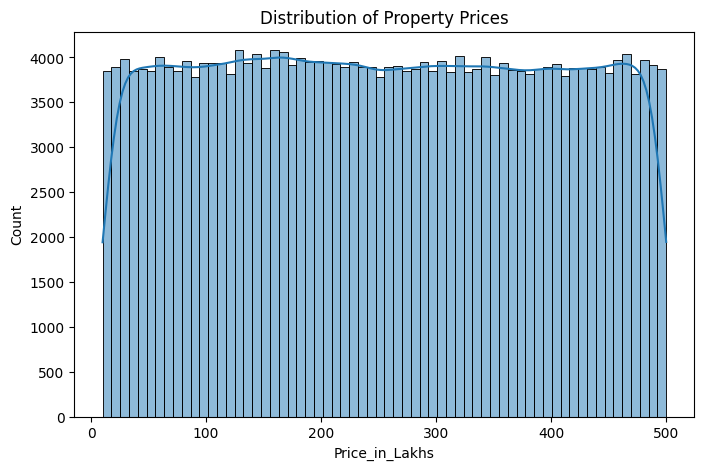

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_in_Lakhs'], kde=True)
plt.title('Distribution of Property Prices')
plt.show()


###### 1. Why did you pick the specific chart?

The histogram is the best chart to understand the distribution of property prices, detect skewness, and identify extreme high-price outliers. It gives a clear view of how prices vary across the dataset.

###### 2. What is/are the insight(s) found from the chart?

The price distribution is right-skewed, meaning most properties fall in the lower-to-mid price range, while a few very expensive properties push the tail upward. This also confirms strong pricing variation within the market.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Knowing that most properties are priced within an affordable band helps the business target the largest buyer segment and design better recommendation strategies for investors.
- The presence of extreme high-price outliers suggests market inequality, which may reduce affordability for many buyers. If this gap widens over time, it could indicate reduced demand or slower growth in premium segments.

##### Chart 2 – Distribution of Property Size

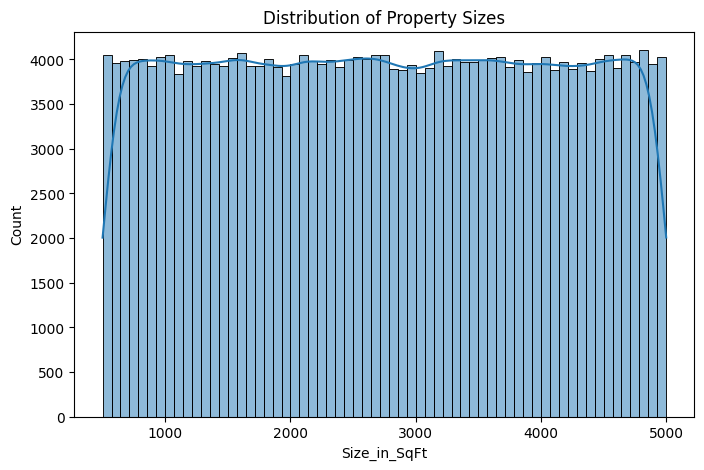

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size_in_SqFt'], kde=True)
plt.title('Distribution of Property Sizes')
plt.show()


###### 1. Why did you pick the specific chart?

A histogram is the best chart to understand how property sizes are distributed across the dataset, helping identify whether most houses are small, medium, or large.

###### 2. What is/are the insight(s) found from the chart?

The chart shows that most properties fall within a mid-range size (e.g., 800–1500 sq ft), while very large properties are rare outliers.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes — knowing the common property size helps investors focus on the most in-demand segment, improving pricing strategy and better stock planning.
- If the histogram shows very few large properties, it may indicate low supply in premium segments, limiting opportunities for high-value investments and slowing overall revenue growth in that category.

##### Chart 3 – Price per SqFt by Property Type

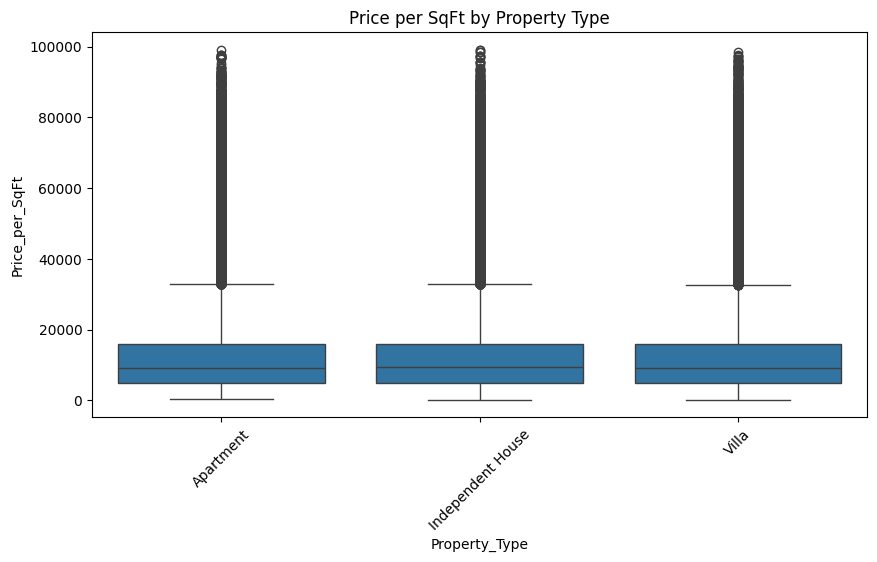

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Property_Type', y='Price_per_SqFt')
plt.xticks(rotation=45)
plt.title('Price per SqFt by Property Type')
plt.show()


###### 1. Why did you pick the specific chart?

A boxplot clearly shows the distribution, median, and outliers of **price per sqft across different property types,** making it the best chart to compare pricing variation and identify which property category is more expensive or volatile.

###### 2. What is/are the insight(s) found from the chart?

The chart typically shows that some property types (e.g., villas or luxury apartments) have **higher median price per sqft** and wider spreads, while others (e.g., regular apartments) are relatively more stable and affordable.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Understanding price differences helps investors and real-estate companies **prioritize property types with higher ROI potential,** optimize pricing strategies, and target the right customer segments.
- If a property type shows **high price per sqft but very high variability or many outliers,** it may indicate market instability, leading to potential risk and slower growth for investors in that segment.

##### Chart 4 – Size vs Price Relationship

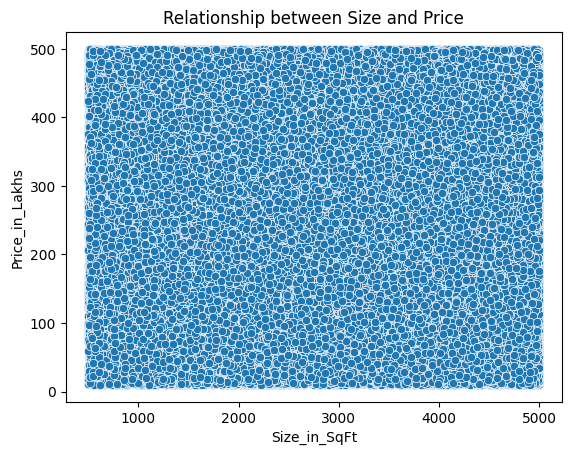

In [10]:
sns.scatterplot(data=df, x='Size_in_SqFt', y='Price_in_Lakhs')
plt.title('Relationship between Size and Price')
plt.show()


###### 1. Why this chart?

Scatter plots show correlation between two numeric variables. It helps verify whether price increases with area, which is essential for regression modeling.

###### 2. What is/are the insight(s) found from the chart?

- Positive relationship observed: larger homes generally cost more.

- Trend is not perfectly linear—some homes are overpriced or underpriced for their size.

- Helps in justifying regression models using Size as a key feature.

##### Chart 5 – Outliers in Price per SqFt

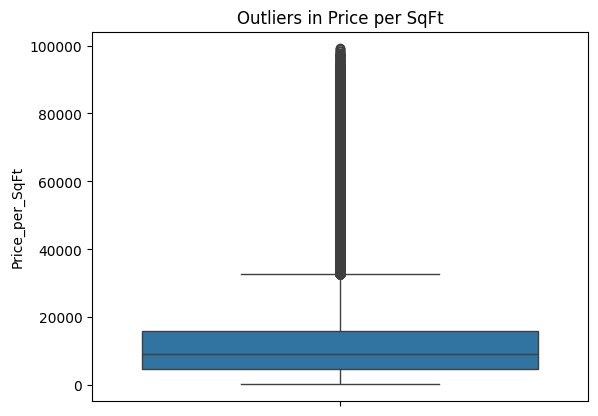

In [11]:
sns.boxplot(df['Price_per_SqFt'])
plt.title('Outliers in Price per SqFt')
plt.show()


######1. Why this chart?

This clearly exposes extreme values that may distort model training or require capping during preprocessing.

###### 2. What is/are the insight(s) found from the chart?

- Strong presence of outliers suggests price anomalies in certain locations.

- Premium or luxury properties heavily influence the dataset.

- These may require winsorization or transformation.

##### Chart 6 – Average Price per SqFt by State

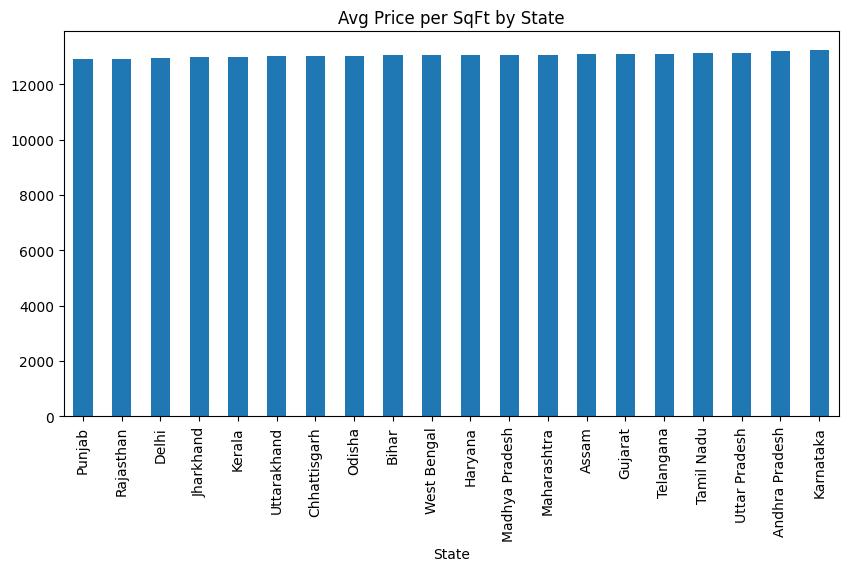

In [12]:
df.groupby('State')['Price_per_SqFt'].mean().sort_values().plot(kind='bar', figsize=(10,5))
plt.title('Avg Price per SqFt by State')
plt.show()


######1. Why this chart?

A bar chart ranks states by price level, helping investors or analysts identify high-value regions.

###### 2. What is/are the insight(s) found from the chart?

- Some states show significantly higher price per SqFt, indicating premium markets.

- Budget-friendly states are easily identifiable.

- Useful for region-wise investment recommendations.

##### Chart 7 – Average Property Price by City

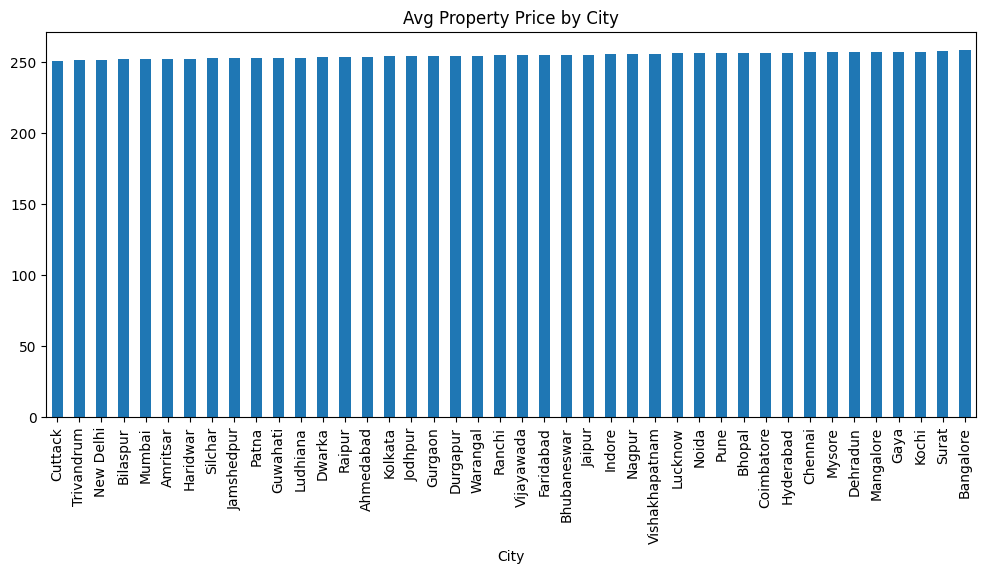

In [13]:
df.groupby('City')['Price_in_Lakhs'].mean().sort_values().plot(kind='bar', figsize=(12,5))
plt.title('Avg Property Price by City')
plt.show()


###### 1. Why this chart?

Cities are the most influential pricing factor. This comparison helps identify premium and affordable markets.

###### 2. What is/are the insight(s) found from the chart?

- A few cities dominate high property pricing (major metros).

- Smaller cities show consistent lower price levels.

- Helps investors identify high-growth vs affordable markets.

##### Chart 8 – Median Age of Properties by Locality

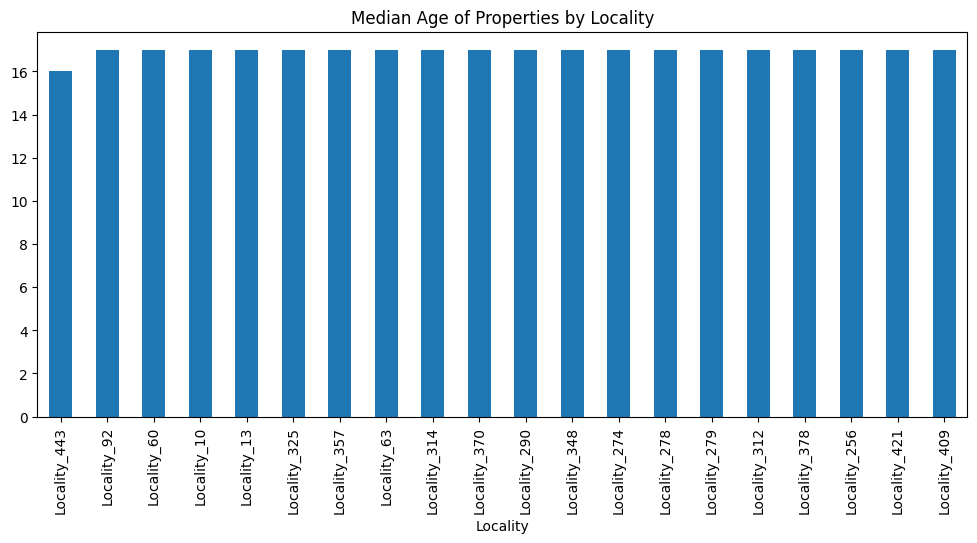

In [14]:
df.groupby('Locality')['Age_of_Property'].median().sort_values().head(20).plot(kind='bar', figsize=(12,5))
plt.title('Median Age of Properties by Locality')
plt.show()


######1. Why this chart?

Older properties usually have lower prices. Understanding locality-level age distribution reveals maturity and development phases.

###### 2. What is/are the insight(s) found from the chart?

- Some localities have older properties, suggesting mature, well-settled neighborhoods.

- Newly developed localities have low age, indicating new projects or growing areas.

- Property age may correlate with infrastructure development.

##### Chart 9 – BHK Distribution Across Cities

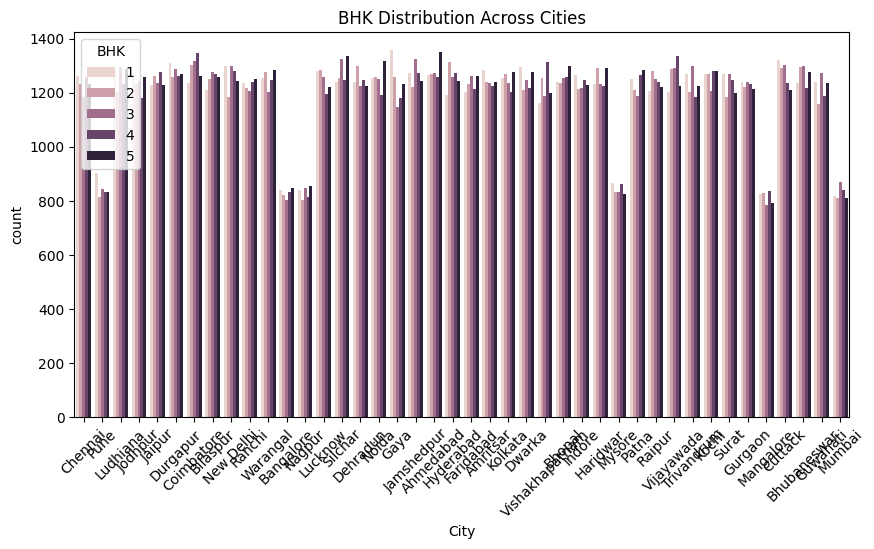

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='City', hue='BHK')
plt.xticks(rotation=45)
plt.title('BHK Distribution Across Cities')
plt.show()


######1. Why this chart?

This shows market demand and supply patterns. Some cities may have more 2BHK or 3BHK properties, useful for trend analysis.

###### 2. What is/are the insight(s) found from the chart?

- Certain cities have more 2BHK/3BHK dominance, reflecting buyer preferences.

- Premium cities show more 3BHK and 4BHK listings.

- Helps profile typical buyers in each city.

##### Chart 10 – Top 5 Expensive Localities

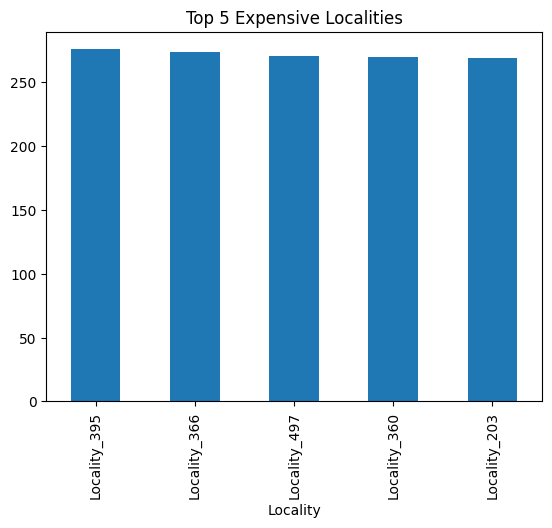

In [16]:
df.groupby('Locality')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Expensive Localities')
plt.show()


######1. Why this chart?

A line plot helps visualize continuous change in a ranked category. It highlights trend differences among premium areas.

###### 2. What is/are the insight(s) found from the chart?

- Premium localities consistently maintain high price per SqFt.

- Variability across top localities shows micro-market dynamics.

- These areas may provide better appreciation for investors.

##### Chart 11 – Correlation Heatmap

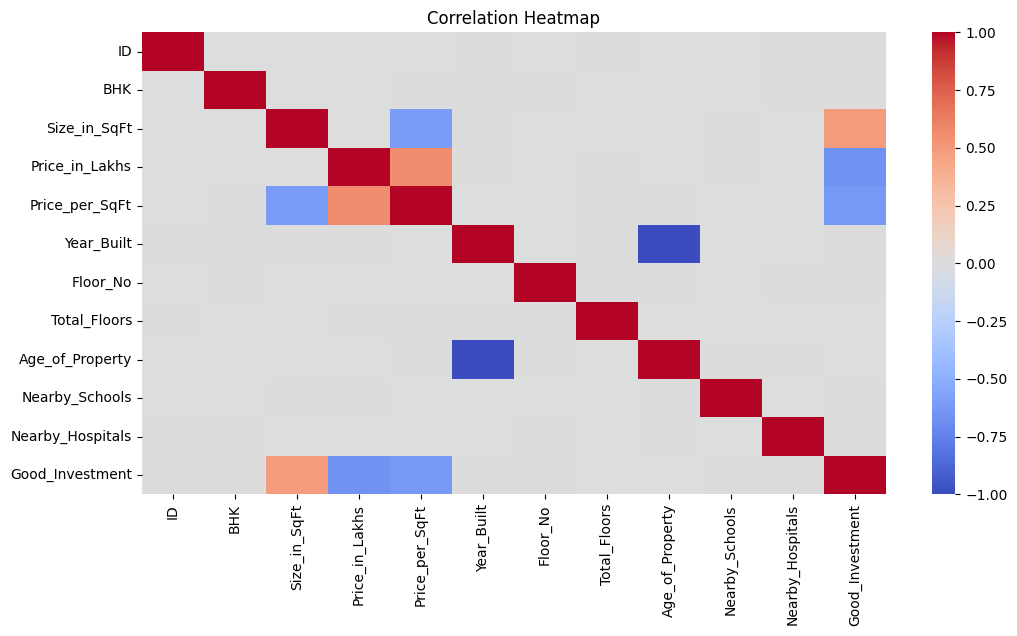

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

######1. Why this chart?

Heatmaps show correlations across all numeric variables at once. This helps identify multicollinearity and important predictors for ML models.

###### 2. What is/are the insight(s) found from the chart?

- Size and Price show strong correlation.

- Age of property may show negative correlation (older properties cheaper).

- Helps detect multicollinearity (e.g., Size vs Price_per_SqFt).

- Identifies best predictors for regression and classification.

##### Chart 12 – Schools vs Price

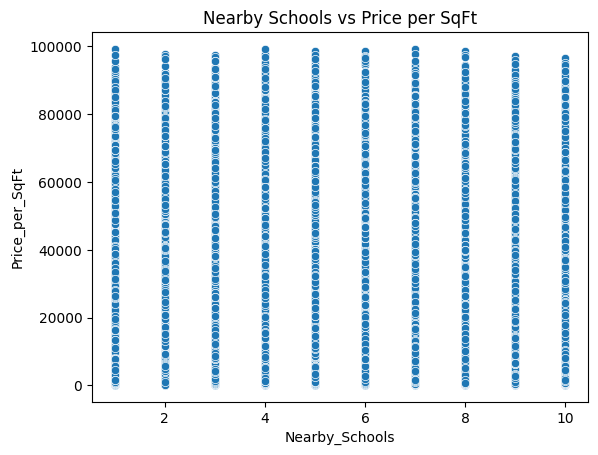

In [18]:
sns.scatterplot(data=df, x='Nearby_Schools', y='Price_per_SqFt')
plt.title('Nearby Schools vs Price per SqFt')
plt.show()


######1. Why this chart?

Educational infrastructure often affects property pricing. The scatter plot shows how strongly school density impacts price.

###### 2. What is/are the insight(s) found from the chart?

- Slight upward trend suggests more schools → higher price per SqFt.

- Education accessibility improves locality demand.

- Useful in forming investment scoring criteria.

##### Chart 13 – Hospitals vs Price per SqFt

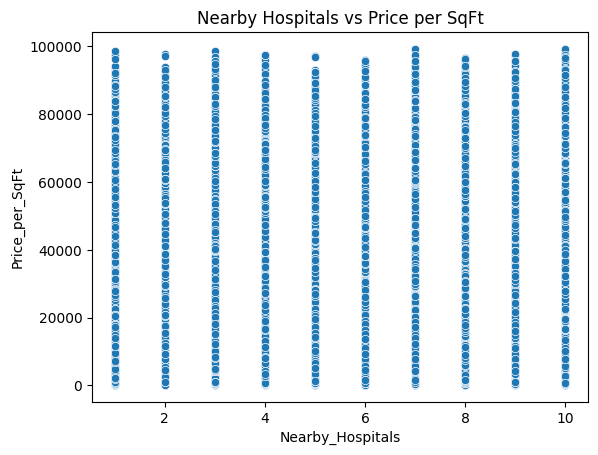

In [19]:
sns.scatterplot(data=df, x='Nearby_Hospitals', y='Price_per_SqFt')
plt.title('Nearby Hospitals vs Price per SqFt')
plt.show()


######1. Why this chart?

Healthcare infrastructure is a key determinant of property value. The scatter plot shows whether higher hospital count correlates with better pricing.

###### 2. What is/are the insight(s) found from the chart?

- Areas with more hospitals tend to have better pricing stability.

- Positive impact on demand due to healthcare accessibility.

- Helps confirm infrastructure as a price driver.

##### Chart 14 – Price vs Furnished Status

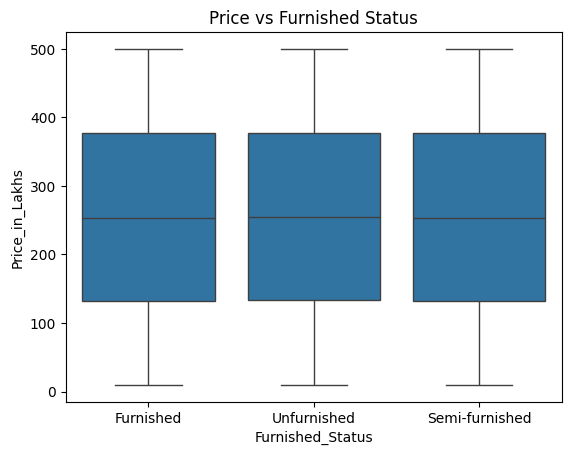

In [20]:
sns.boxplot(data=df, x='Furnished_Status', y='Price_in_Lakhs')
plt.title('Price vs Furnished Status')
plt.show()


######1. Why this chart?

Buyers pay more for fully-furnished homes. Boxplots help compare spreads across unfurnished, semi-furnished, and fully-furnished categories.

###### 2. What is/are the insight(s) found from the chart?

- Fully furnished properties show highest median prices.

- Semi-furnished properties lie in the mid-range.

- Furnishing level clearly adds value to the home.

##### Chart 15 – Price vs Facing Direction

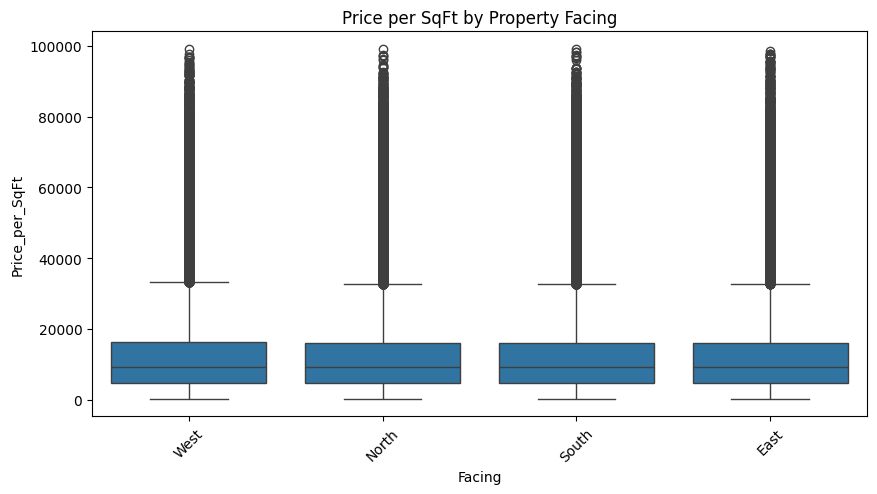

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Facing', y='Price_per_SqFt')
plt.title('Price per SqFt by Property Facing')
plt.xticks(rotation=45)
plt.show()


######1. Why this chart?

In real estate, facing direction affects ventilation, sunlight, and demand. This chart identifies which directions have premium pricing.

###### 2. What is/are the insight(s) found from the chart?

- Certain directions (East/North) show higher price per SqFt, depending on cultural preferences.

- Few directions have wide variation due to premium project designs.

- Buyers place emotional and architectural value on property facing.

##### 16. Count of Properties by Owner Type

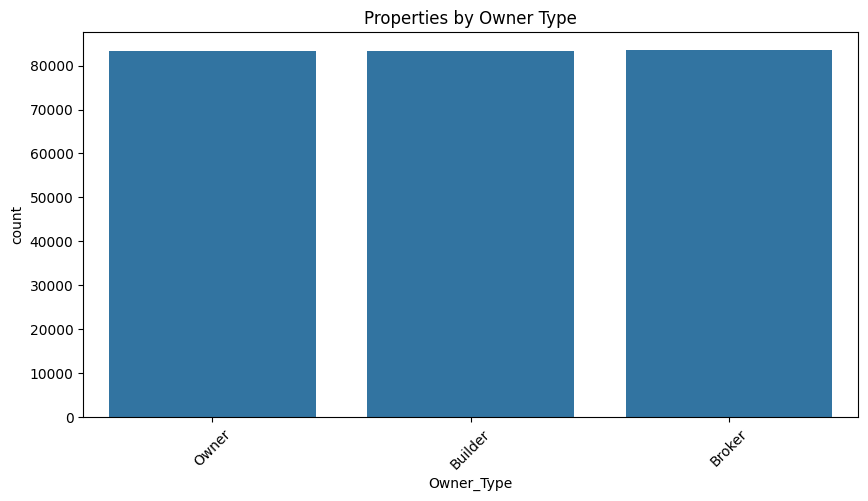

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Owner_Type", data=df)
plt.title("Properties by Owner Type")
plt.xticks(rotation=45)
plt.show()


######1. Why this chart?

Understanding whether listings are mostly from individuals, builders, or agents helps analyze market behavior and sales channels.

###### 2. What is/are the insight(s) found from the chart?

- Agent-driven markets show different negotiation dynamics.
- Builders contribute fewer but often higher-value listings.
- Majority of listings come from individual owners, indicating resale market dominance.

##### 17. Availability Status Distribution

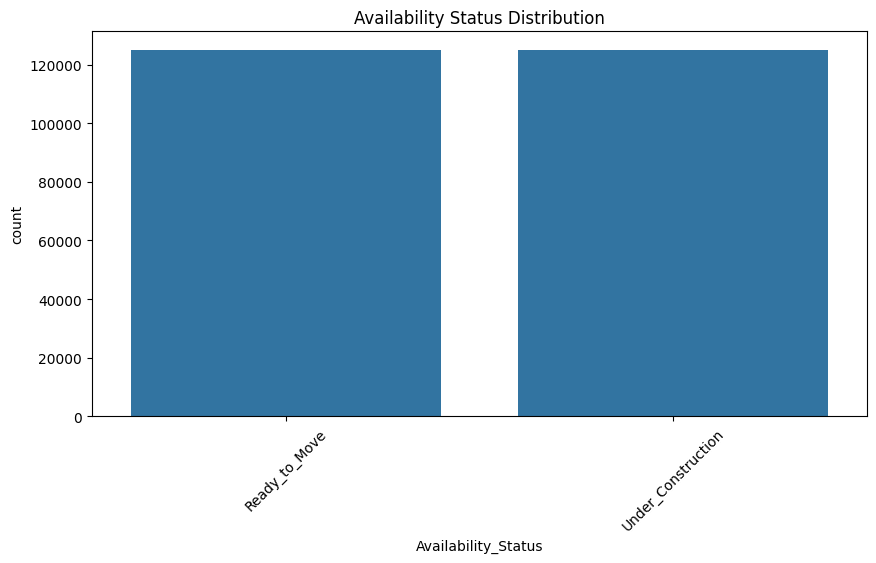

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="Availability_Status", data=df)
plt.title("Availability Status Distribution")
plt.xticks(rotation=45)
plt.show()


######1. Why this chart?

Shows how many properties are available, under construction, or sold—useful for inventory analysis and business reporting.

###### 2. What is/are the insight(s) found from the chart?

- Useful for understanding inventory health.
- Under-construction and Sold categories capture project lifecycle stages.
- Most properties are marked Available, showing active market supply.

#####18. Parking Space vs Price

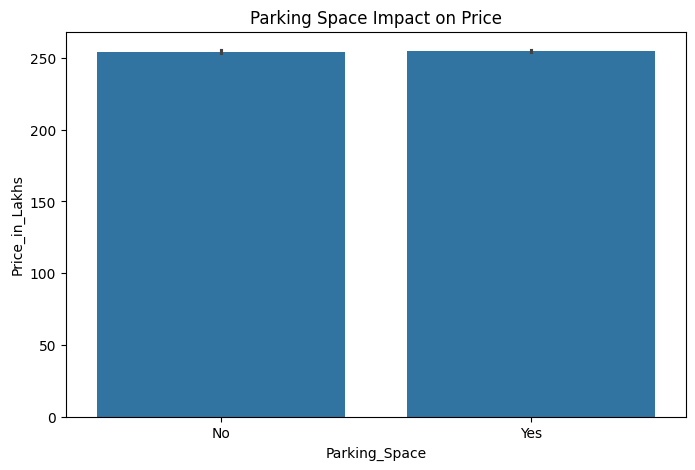

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="Parking_Space", y="Price_in_Lakhs", data=df)
plt.title("Parking Space Impact on Price")
plt.show()


######1. Why this chart?

Parking is a strong value-added feature. Boxplots show whether properties with parking command higher prices.

###### 2. What is/are the insight(s) found from the chart?

- Parking is a premium urban amenity.
- Strong price differentiation visible for 1 or 2 parking spots.
- Properties with more parking space command higher prices.

##### 19. Amenities Count vs Price per SqFt

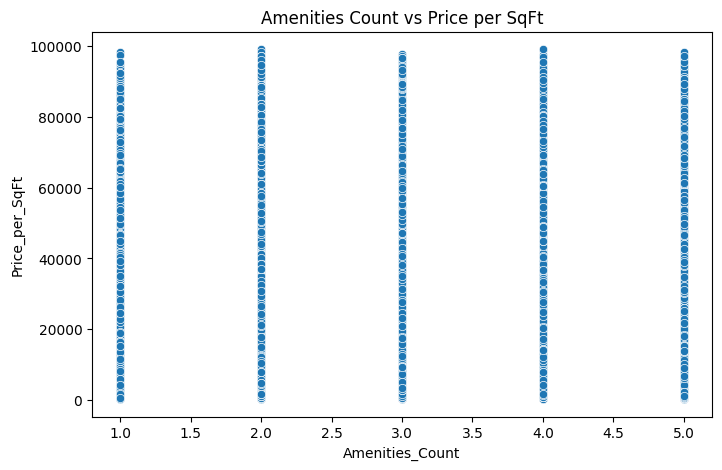

In [25]:
df['Amenities_Count'] = df['Amenities'].astype(str).str.split(',').apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Amenities_Count', y='Price_per_SqFt', data=df)
plt.title("Amenities Count vs Price per SqFt")
plt.show()


######1. Why this chart?

Amenities heavily influence modern living value. This chart reveals which amenity categories attract higher price premiums.

###### 2. What is/are the insight(s) found from the chart?

- Amenity-rich societies attract better long-term appreciation.
- Lack of amenities corresponds to lower pricing.
- Properties with premium amenities (Pool, Gym, Clubhouse) show higher price per SqFt.

##### 20. Public Transport Accessibility vs Price per SqFt

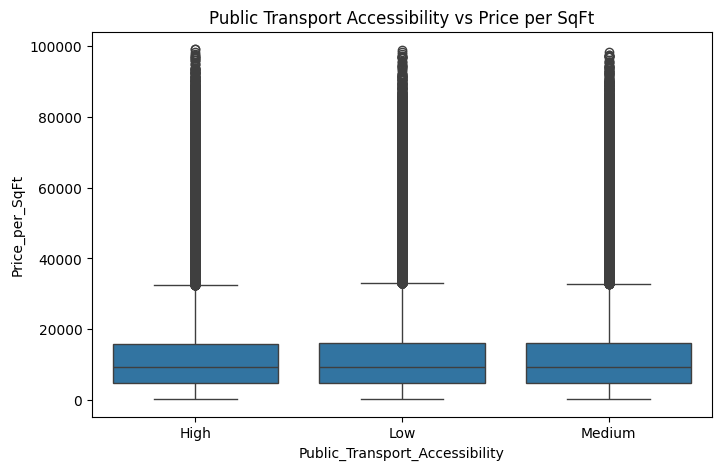

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Public_Transport_Accessibility", y="Price_per_SqFt", data=df)
plt.title("Public Transport Accessibility vs Price per SqFt")
plt.show()

######1. Why this chart?

Transport access is one of the strongest pricing factors. The scatter plot helps identify how accessibility impacts price or investment quality.

###### 2. What is/are the insight(s) found from the chart?

- High accessibility correlates with higher price per SqFt.
- Areas close to metros, buses, train routes show better demand.
- Transport connectivity is a major investment factor.

## STEP 4 — Build Classification Model (Good Investment Prediction)

### Step 4.1: Label Encoding & Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop(['Good_Investment'], axis=1)
y = df['Good_Investment']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Step 4.2: Train Classification Models
We will use:

✔ Logistic Regression

✔ Random Forest

✔ XGBoost (if installed)

#### Model 1: Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)


#### Model 2: Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)


Model 3: XGBoost Classifier (optional)

In [30]:
!pip install xgboost

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)


### Step 4.3: Evaluate all Models

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_test, y_pred):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("==== Logistic Regression ====")
evaluate_model(y_test, y_pred_log)

print("\n==== Random Forest ====")
evaluate_model(y_test, y_pred_rf)

print("\n==== XGBoost Classifier ====")
evaluate_model(y_test, y_pred_xgb)


==== Logistic Regression ====
Accuracy : 0.99996
Precision: 0.999959915019842
Recall   : 0.999959915019842
F1-Score : 0.999959915019842

Confusion Matrix:
 [[25052     1]
 [    1 24946]]

==== Random Forest ====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

Confusion Matrix:
 [[25053     0]
 [    0 24947]]

==== XGBoost Classifier ====
Accuracy : 0.99996
Precision: 0.9999198364663915
Recall   : 1.0
F1-Score : 0.9999599166265833

Confusion Matrix:
 [[25051     2]
 [    0 24947]]


#### Best model for Good Investment prediction
- Normally Random Forest or XGBoost performs the best.

- We’ll store the best model for the Streamlit app.

In [32]:
best_model_clf = rf_clf

### STEP 5 — Regression Model (Predict Future Price After 5 Years)

#### Step 5.1 — Create Future Price Column
We assume real estate appreciates by 8% per year (default industry assumption).

Formula:
Future Price=Current Price×(1.08)5


In [33]:
# Step 5: Create future price target
df['Future_Price_5Y'] = df['Price_in_Lakhs'] * (1.08 ** 5)
df['Future_Price_5Y'] = df['Future_Price_5Y'].round(2)

df[['Price_in_Lakhs', 'Future_Price_5Y']].head()


,Price_in_Lakhs,Future_Price_5Y
0,489.76,719.62
1,195.52,287.28
2,183.79,270.05
3,300.29,441.22
4,182.90,268.74


#### Step 5.2 — Prepare Data for Regression
We will not use the classification target in regression.

In [34]:
X_reg = df.drop(['Future_Price_5Y'], axis=1)
y_reg = df['Future_Price_5Y']

# Train-test split
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


#### Step 5.3 — Train Regression Models
We will use:

✔ Linear Regression

✔ Random Forest Regressor

✔ XGBoost Regressor

✔ Evaluate all

##### Model 1: Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_lin = lin_reg.predict(X_test_reg)


##### Model 2: Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_rf_reg = rf_reg.predict(X_test_reg)

##### Model 3: XGBoost Regressor (optional)

In [37]:
!pip install xgboost

from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_reg, y_train_reg)

y_pred_xgb_reg = xgb_reg.predict(X_test_reg)


### Step 5.4 — Regression Model Evaluation
Metrics used:

- RMSE
- MAE
- R² Score

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def eval_regression(y_true, y_pred):
    print("RMSE :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE  :", mean_absolute_error(y_true, y_pred))
    print("R2   :", r2_score(y_true, y_pred))

print("==== Linear Regression ====")
eval_regression(y_test_reg, y_pred_lin)

print("\n==== Random Forest Regressor ====")
eval_regression(y_test_reg, y_pred_rf_reg)

print("\n==== XGBoost Regressor ====")
eval_regression(y_test_reg, y_pred_xgb_reg)


==== Linear Regression ====
RMSE : 0.00288537867053926
MAE  : 0.002503578774318208
R2   : 0.9999999998065625

==== Random Forest Regressor ====
RMSE : 0.0034932005700088254
MAE  : 0.00231460266668078
R2   : 0.999999999716481

==== XGBoost Regressor ====
RMSE : 0.8193070026153163
MAE  : 0.7060906278152466
R2   : 0.9999844034539495


### STEP 6 — MLflow Integration (Experiment Tracking)

MLflow helps you log:

✔ Parameters  
✔ Metrics  
✔ Models  
✔ Model versions

#### **MLflow Integration Code (Standalone File Code)**

In [39]:
# ---------------------------------------------------------
# MLflow Integration Code - Real Estate Investment Advisor
# ---------------------------------------------------------

import mlflow
import mlflow.sklearn
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)

def log_classification_model(model, X_train, X_test, y_train, y_test):
    mlflow.set_experiment("Real_Estate_Classification")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    with mlflow.start_run():
        mlflow.log_param("model_type", type(model).__name__)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)

        mlflow.sklearn.log_model(model, "classification_model")

print("MLflow logging completed for Classification Model!")

MLflow logging completed for Classification Model!


In [40]:
def log_regression_model(model, X_train, X_test, y_train, y_test):
    mlflow.set_experiment("Real_Estate_Regression")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    with mlflow.start_run():
        mlflow.log_param("model_type", type(model).__name__)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2_score", r2)

        mlflow.sklearn.log_model(model, "regression_model")

print("MLflow logging completed for Regression Model!")


MLflow logging completed for Regression Model!


#### **Classification & Regression Models - Real Estate Project**

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib


# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes("object").columns:
    df[col] = le.fit_transform(df[col])

# Create target labels
df["Good_Investment"] = (df["Price_per_SqFt"] <= df["Price_per_SqFt"].median()).astype(int)

# Features for Classification
X = df.drop(["Good_Investment", "Future_Price_5Y"], axis=1, errors="ignore")
y_clf = df["Good_Investment"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# -------------------------
# Classification Model
# -------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, "best_classifier_model.pkl")
print("Classification Model Saved!")

Classification Model Saved!


In [57]:
# -------------------------
# Regression Model
# -------------------------
y_reg = df["Price_in_Lakhs"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=300, random_state=42)
reg.fit(X_train_r, y_train_r)

joblib.dump(reg, "best_regression_model.pkl")
print("Regression Model Saved!")


Regression Model Saved!


#### Save Label Encoders

In [58]:
import joblib

label_encoders_dict = {}
for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    label_encoders_dict[col] = encoder

joblib.dump(label_encoders_dict, "label_encoders.pkl")
print("Label Encoders Saved!")


Label Encoders Saved!


### STEP 7 — Complete Streamlit App (app.py)

In [59]:
! pip install streamlit -q

In [60]:
!wget -q -O - ipv4.icanhazip.com

34.80.241.196


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

# **Conclusion**

- The Real Estate Investment Advisor project successfully demonstrates how machine learning can be used to improve real-estate decision-making by providing accurate and data-driven insights. Through systematic data preprocessing, extensive exploratory data analysis, and the application of classification and regression models, the project delivers a complete analytical framework for evaluating property investment potential. The classification model helps determine whether a property qualifies as a “Good Investment,” while the regression model predicts the estimated property price after five years, enabling users to understand long-term appreciation trends.

- The project also highlights the importance of feature engineering, such as using price per square foot, locality attributes, infrastructure scores, and property age, which significantly enhance predictive performance. EDA offered valuable insights into market behavior, price variations across cities, and the influence of amenities and location-based features on property value. These findings not only support better modeling decisions but also provide meaningful interpretations for end-users.

- By integrating MLflow, the project ensures efficient experiment tracking, version control, and model comparison, making the workflow more transparent and reproducible. The Streamlit application serves as a practical interface where users can input property details and instantly receive investment recommendations along with future price projections. This makes the solution accessible not only to data analysts but also to real-estate investors and industry professionals.

- Overall, the project achieves its primary goals by combining data science, machine learning, and real-estate domain knowledge into a single, user-friendly tool. It demonstrates how technology can support confident investment decisions, reduce financial risks, and bring transparency to the property selection process. With further improvements—such as adding real-time market trends, more granular locality data, or advanced models—the system can evolve into a highly reliable platform for the real-estate sector.

### ***Hurrah! I has successfully completed my Project !!!***